## Team Name: MovieBuddy
## Team Members:
## UNI: hs3159 Name: Harguna Sood, github_id: harguna
## UNI: hj2533 Name: Hritik Jain, github_id: hritik25
## UNI: sk4661 Name: Sachit Kumar, github_id: sachit-kumar
## UNI: sv609 Name: Siddhanth Vinay¶ github_id: sidvin97

## MOVIE_LENS DATASET:
- **Number of ratings** = 20,000,263
- **Number of movies** = 27,278
- **Number of users** = 138,493

### We start by exploring the data

##### We will be using "ratings.csv" and "movies.csv" files for our analyses. 

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
movies_df = pd.read_csv("data/ml-20m/movies.csv")
ratings_df = pd.read_csv("data/ml-20m/ratings.csv")
merged_data = pd.merge(ratings_df, movies_df, on='movieId')

In [0]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [0]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [0]:
merged_data.head()

,userId,movieId,rating,timestamp,title,genres
0,1,2,3.5,1112486027,Jumanji (1995),Adventure|Children|Fantasy
1,5,2,3.0,851527569,Jumanji (1995),Adventure|Children|Fantasy
2,13,2,3.0,849082742,Jumanji (1995),Adventure|Children|Fantasy
3,29,2,3.0,835562174,Jumanji (1995),Adventure|Children|Fantasy
4,34,2,3.0,846509384,Jumanji (1995),Adventure|Children|Fantasy


#### Distribution of average ratings of movies

In [0]:
movie_ratings = pd.DataFrame(merged_data.groupby('movieId')['rating'].mean())
movie_ratings['rating_counts'] = pd.DataFrame(merged_data.groupby('movieId')['rating'].count())

Text(0, 0.5, 'Number of movies')

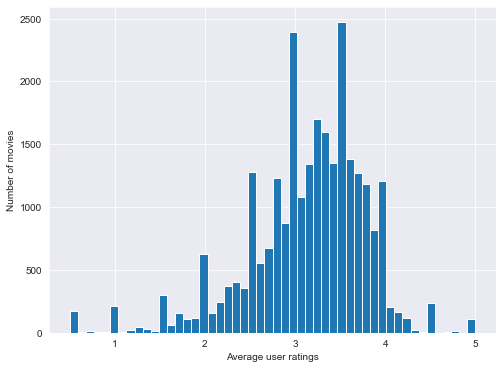

In [34]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
movie_ratings['rating'].hist(bins=50)
plt.xlabel("Average user ratings")
plt.ylabel("Number of movies")

#### The plot above shows that on average, user rating lies between 3 and 4

#### Distribution of number of user ratings available for movies

Text(0, 0.5, 'Number of movies')

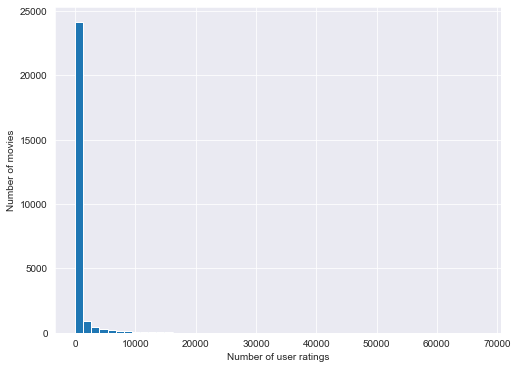

In [0]:
sns.set_style('dark')
%matplotlib inline

plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
movie_ratings['rating_counts'].hist(bins=50)
plt.xlabel("Number of user ratings")
plt.ylabel("Number of movies")

#### To make the above plot more interpretable, we convert the x-axis to log scale

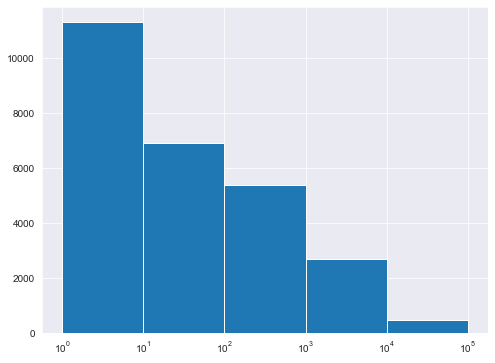

In [0]:
#Histogram of rating counts,i.e., number of ratings for a movie
# sns.set_style('dark')
%matplotlib inline

plt.figure(figsize=(8,6))
plt.xscale('log')
movie_ratings['rating_counts'].hist(bins=np.array([0, 1, 10, 100, 1000, 10000, 100000]))

#### By plotting on the log scale, it becomes very clear that most of the movies have few ratings

#### Next, let us see the relationship between number of ratings and the ratings.

<Figure size 576x432 with 0 Axes>

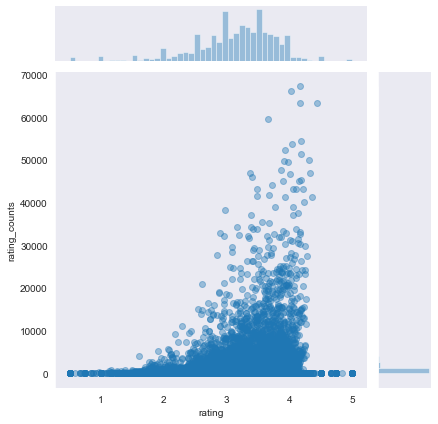

In [0]:
# Number of ratings of a movie vs average rating of a movie
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='rating', y='rating_counts', data=movie_ratings, alpha=0.4)

#### From the above plot, we can see the number of ratings and average rating of a movie are positively correlated.

In [0]:
user_ratings = pd.DataFrame(merged_data.groupby('userId')['rating'].mean())
user_ratings['rating_counts'] = pd.DataFrame(merged_data.groupby('userId')['rating'].count())

Text(0, 0.5, 'Number of users')

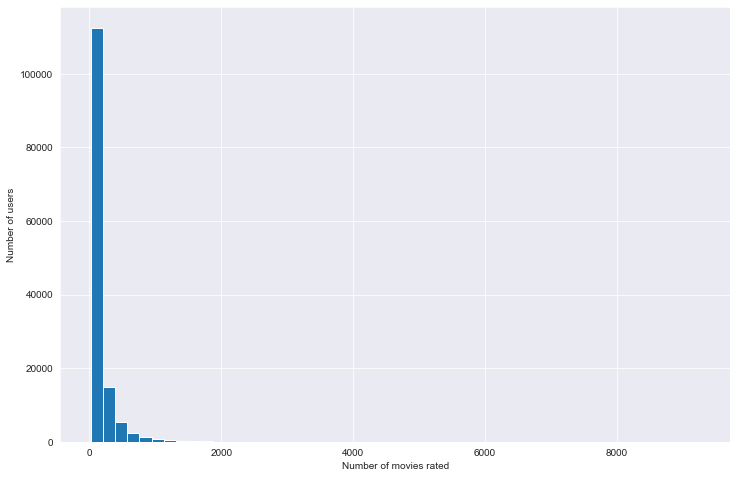

In [0]:
#Histogram of rating counts,i.e., number of ratings by a user
sns.set_style('dark')
%matplotlib inline

plt.figure(figsize=(12,8))
plt.rcParams['patch.force_edgecolor'] = True
user_ratings['rating_counts'].hist(bins=50)
plt.xlabel("Number of movies rated")
plt.ylabel("Number of users")

#### From the plot above, we see that most of the users have rated less number of movies

#### Distribution of average ratings by users

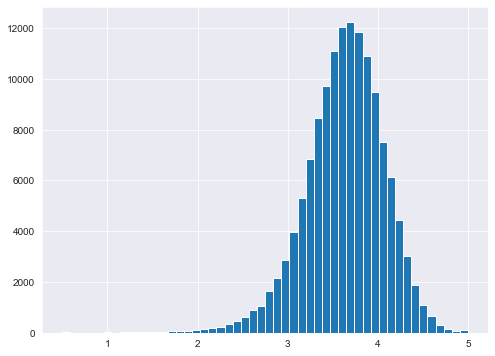

In [0]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
user_ratings['rating'].hist(bins=50)

#### Reresentation of genre in the data:

In [0]:
# to get an idea of the distribution of the genres on the movies, 
# create one entry for each genre a movie is associated with

movies_df_genre = pd.DataFrame(movies_df.genres.str.split('|').tolist(), index=movies_df.movieId).stack()
movies_df_genre = movies_df_genre.reset_index([0, 'movieId'])
movies_df_genre.rename(columns={0:"genre"}, inplace=True)
movies_df_genre.head()

,movieId,genre
0,1,Adventure
1,1,Animation
2,1,Children
3,1,Comedy
4,1,Fantasy


<Figure size 1440x1440 with 0 Axes>

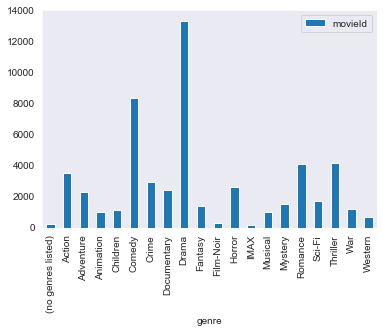

In [0]:
plt.figure(figsize = (20, 20))
f = movies_df_genre.groupby('genre').count().plot(kind='bar')
plt.show(f)

## REPORT

### Building a recommender system:

For this project, we try to build a system to recommend movies to a user using the movie_lens dataset.

Our objective is to achieve a higher item-coverage and discoverability in our recommendations, i.e, we also want to recommend those movies to a user which have less number of ratings.

Our hope is that once we recommend movies with lesser number of ratings, i.e., not just popular movies, we may be able to expand a users taste and increase the number of user-ratings for those movies. Using these ratings, we will be able to build a more accurate recommender sytem in the future.

To achieve these objectives, we are willing to sacrifice the accuracy of our predictions at some level.




### Withholding 10% of the ratings for final testing

In [0]:
# withholding a random 10% of the entire dataset as the true test set

# set a seed for reproducibility
np.random.seed(42)
ratings_df_full = ratings_df
msk = np.random.rand(len(ratings_df_full)) < 0.9
ratings_df = ratings_df_full[msk]
ratings_df_test = ratings_df_full[~msk]
# ratings_df_test.to_csv('ratings_test.csv', index=False)

## Sampling methodology:

In order to achieve our objective, we sample our data in the following way:

We first bin the movies of the given dataset by number of ratings using log-space bins with widths 1-10,10-100,100-1000,1000-10000,>10000 (see the plot below).

Now, we randomly pick 'm' movies from each bins in order to ensure uniform representation of movies across all levels of popularity.

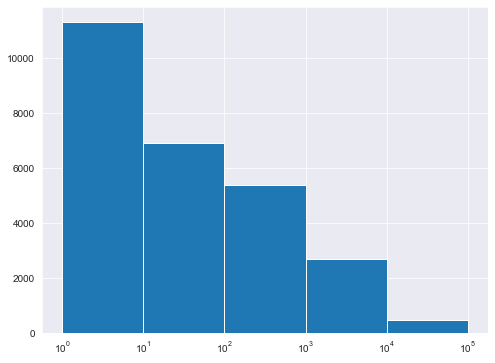

In [0]:
#Histogram of rating counts,i.e., number of ratings for a movie
# sns.set_style('dark')
%matplotlib inline

plt.figure(figsize=(8,6))
plt.xscale('log')
movie_ratings['rating_counts'].hist(bins=np.array([0, 1, 10, 100, 1000, 10000, 100000]))

In [0]:
movies_df = pd.DataFrame(movies_df.genres.str.split('|').tolist(), index=movies_df.movieId).stack()
movies_df = movies_df.reset_index([0, 'movieId'])
movies_df.rename(columns={0:"genre"}, inplace=True)
movies_df.head()

,movieId,genre
0,1,Adventure
1,1,Animation
2,1,Children
3,1,Comedy
4,1,Fantasy


In [0]:
ratings_movies_combined = pd.merge(ratings_df, movies_df, on='movieId')
movie_ratings_count = pd.DataFrame(ratings_movies_combined.groupby('movieId', as_index=False)['rating'].count())
movie_ratings_count.rename(columns={"rating": "rating_counts"}, inplace=True)

rating_counts_bins = []
for i in movie_ratings_count['rating_counts']:
    if i>0 and i <=10:
        rating_counts_bins.append(1)
    elif i>10 and i <=100:
        rating_counts_bins.append(2)
    elif i>100 and i <=1000:
        rating_counts_bins.append(3)
    elif i>1000 and i <=10000:
        rating_counts_bins.append(4)
    elif i>10000:
        rating_counts_bins.append(5)
        
movie_ratings_count['bin'] = rating_counts_bins
movie_ratings_count.head()

,movieId,rating_counts,bin
0,1,223775,5
1,2,60105,5
2,3,22972,5
3,4,7503,4
4,5,10924,5


In [0]:
m = 200 # increase 'm' to 300, 400 subsequently

sampled_movie_ratings_count = movie_ratings_count.groupby('bin').apply(lambda x: x.sample(m, random_state=42)).reset_index(drop=True)
sampled_ratings = pd.merge(ratings_df, sampled_movie_ratings_count, on="movieId")
movies_original_df = pd.read_csv("data/movies.csv")
sampled_ratings_final = pd.merge(sampled_ratings, movies_original_df, on='movieId').drop(columns=['genres'])
#sampled_ratings_final.to_csv('final_sample.csv', index=False)

#### For the neighborhood-based (kNN) model, we are required to further reduce the sample size due computational limitiations

In [0]:
temp = sampled_ratings_final.groupby('userId').size().reset_index(name='count')
reduced_sample = temp[temp['count'] > 50]
reduced_sample = reduced_sample.drop(['count'],axis=1).merge(sampled_ratings_final, on='userId')
len(reduced_sample)

916550

## Metrics

We use the following metrics to evaluate our models:

- **R-squared**: This helps us understand how well our model performs compared to a baseline model which predicts average of the user ratings. 

- **RMSE**: This helps us evauluate the accuracy of our models. Predictions which are far off from the actual ratings will be exaggerated by RMSE. It is sensitive to outliers.

- **MAE**: This helps us understand the average distance between our predictions and the actual values.

- **Catalog coverage**: Gives the percentage of the movies in the dataset present in any of the top k recommendations we give a user.

- **Discoverability**: Recommending lesser popular movies to a user to expand his/her taste. 

## Business Rule:

From the original sample of ratings for 1000 movies, we will add a business rule where for each user, we will take the top 2 genre counts of all the movies they have rated 3.5 and above and randomly recommend 3 movies (which have lesser than 500 ratings and have an average rating of 3+) from those 2 genres. Thus, we want to improve our discovery and coverage by recommending movies that have high average ratings but low number of ratings to users. This not only exposes those movies but will also hopefully be watched by more users now, thus giving us a better training set in the future where these movies have high number of ratings

## Conclusion:

After building and evaluating our model, we see that our models do meet out hypothetical objectives - The coverage and discoverability of our recommendations is high.

However, we would not feel comfortable in putting our solution into production, if we were a real company. 

This is because our KNN model has limitations when it comes to sample sizes. We start with a very small sample size, and see that it is not feasible to scale our recommendations above a certain sample size. 

As for Matrix Factorization, the models coverage itself is not that great(~16 percent). Only when we add a genre-specific specific selection of movies with low number of ratings to we get a good coverage. 


It would be better to explore different models and also more advanced algortihms like hashing, to handle sparse data rather than the models we have implemented and  the brute force algorithms. In reality, we would try and use hybrid models to increase our accuracy and try and overcome our limitations.